In [1]:
import sys
sys.path.append("../mypkg")

In [2]:
from tqdm import trange, tqdm

import numpy as np
import xarray as xr
from easydict import EasyDict as edict
from pathlib import Path
import pickle
import scipy

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import logging

In [3]:
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [4]:
from constants import RES_ROOT, FIG_ROOT, DATA_ROOT
from spectrome import Brain
from sgm.sgm import SGM
from utils.standardize import psd_2tr, stdz_vec

# Load real data

In [5]:
# Load data
ind_psd_xr = xr.open_dataarray(DATA_ROOT/'individual_psd_reordered_matlab.nc')
ind_psd = ind_psd_xr.values
FREQS = ind_psd_xr["frequencies"].values
ind_conn_xr = xr.open_dataarray(DATA_ROOT/'individual_connectomes_reordered.nc')
ind_conn = ind_conn_xr.values;

In [6]:
# define a SGM model
brain = Brain.Brain()
brain.add_connectome(DATA_ROOT)
brain.reorder_connectome(brain.connectome, brain.distance_matrix)

# In fact you do not need the `Brain` class stuff, 
# if you prepared you own sc and dist matrices. 
# Brain class imports the HCP template connectome and distance matrix
sc_mat = brain.connectome
dist_mat = brain.distance_matrix
sgmmodel = SGM(sc_mat, dist_mat, FREQS);

In [7]:
# define parameters and run the model.
# paramdeters are in the order tau_e, tau_i, tauC, speed, alpha, gii, gei
# define all the time constants in seconds
parameters = np.zeros((7))
parameters[0] = 10/1000
parameters[1] = 15/1000
parameters[2] = 18/1000
parameters[3] = 10
parameters[4] = 0.5
parameters[5] = 0.5
parameters[6] = 0.1

sgm_psd = sgmmodel.run_local_coupling_forward(parameters);

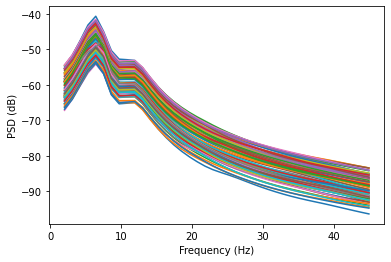

In [8]:
# Every line is an ROI

plt.plot(FREQS, 20*np.log10(sgm_psd).T);
plt.xlabel('Frequency (Hz)');
plt.ylabel('PSD (dB)');